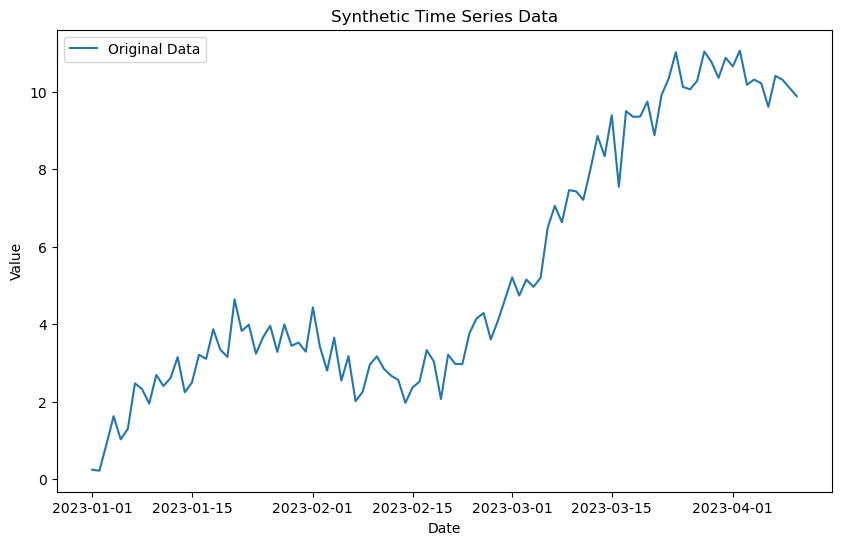

C:\Users\User\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


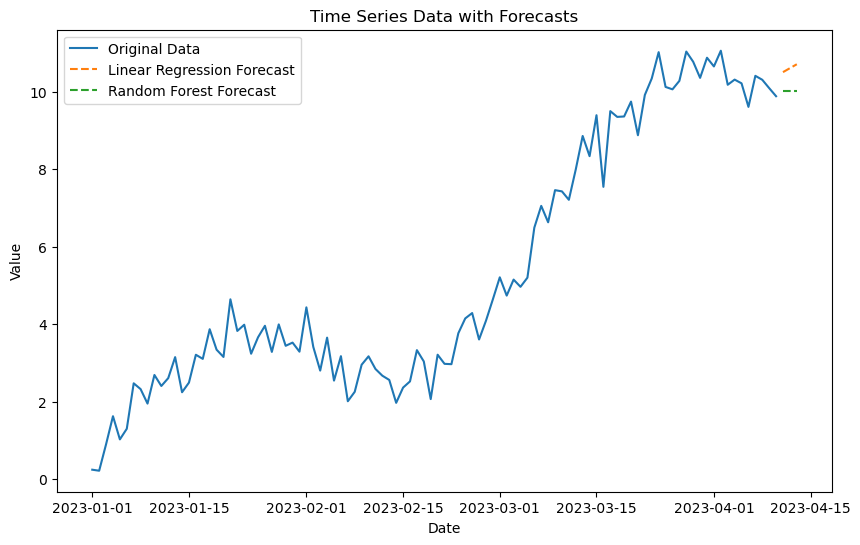

,Date,LinearForecast,RandomForestForecast
0,2023-04-11,10.504118,10.014436
1,2023-04-12,10.605825,10.014436
2,2023-04-13,10.707532,10.014436


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Generate a synthetic time series dataset
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=100, freq='D')
trend = np.linspace(start=0, stop=10, num=100)
seasonal = 2 * np.sin(np.linspace(start=0, stop=3 * np.pi, num=100))
noise = np.random.normal(loc=0, scale=0.5, size=100)
data = trend + seasonal + noise

time_series_data = pd.DataFrame({'Date': date_range, 'Value': data})

# Plot the synthetic time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Date'], time_series_data['Value'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.legend()
plt.show()

# Prepare the data
time_series_data['Day'] = np.arange(len(time_series_data))

# Linear Regression
X = time_series_data[['Day']]
y = time_series_data['Value']

linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X, y)

# Forecast the next 3 days
future_days = np.array([[100], [101], [102]])
linear_forecast = linear_reg.predict(future_days)
random_forest_forecast = random_forest.predict(future_days)

# Append the forecast to the original data
forecast_dates = pd.date_range(start='2023-04-11', periods=3, freq='D')
forecast_data = pd.DataFrame({'Date': forecast_dates, 'LinearForecast': linear_forecast, 'RandomForestForecast': random_forest_forecast})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Date'], time_series_data['Value'], label='Original Data')
plt.plot(forecast_data['Date'], forecast_data['LinearForecast'], label='Linear Regression Forecast', linestyle='--')
plt.plot(forecast_data['Date'], forecast_data['RandomForestForecast'], label='Random Forest Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Forecasts')
plt.legend()
plt.show()

forecast_data



In [3]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE for both models
# We'll use the last 10 days of the dataset as the test set

# Prepare the test set
test_days = np.array(range(90, 100)).reshape(-1, 1)
true_values = time_series_data['Value'].iloc[90:100].values

# Predictions
linear_pred = linear_reg.predict(test_days)
random_forest_pred = random_forest.predict(test_days)

# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(true_values, linear_pred))
rmse_random_forest = np.sqrt(mean_squared_error(true_values, random_forest_pred))

print("rmse lin:",rmse_linear)

print("rmse rfor:",rmse_random_forest)



rmse lin: 0.685008112259774
rmse rfor: 0.13120002364202404


C:\Users\User\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
